<a href="https://colab.research.google.com/github/BrunoTohoru/TensorFlow/blob/main/03_introdu%C3%A7%C3%A3o_a_visao_de_computador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introdução a Redes Neurais Convulucionais e Visão de Computadores com Tensorflow

Visão de Computadores é a pratica de escrever algoritmos que pode descobrir padrões em dados visuais. Como a camera de um carro autônomo reconhecer um carro a frente.



## Pegar os dados

In [14]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Extrair o arquivo

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-31 14:16:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  28.7MB/s    in 3.8s    

2023-08-31 14:16:24 (27.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspecionar os dados

É muito importante conhecer os dados que estamos trabalhando

In [15]:
!ls pizza_steak

test  train


In [16]:
!ls pizza_steak/train

pizza  steak


In [17]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [18]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [19]:
# Outro jeito de descobrir a quantiddade de imagens temos
print("train steak")
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
print(num_steak_images_train)
print("train pizza")
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
print(num_pizza_images_train)
print("test steak")
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))
print(num_steak_images_test)
print("test pizza")
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))
print(num_pizza_images_test)

train steak
750
train pizza
750
test steak
250
test pizza
250


Para vizualizarmos nossas imagens, primeiro temos que programar as classes de nomes.

In [20]:
# Programando os nomes das classes
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # cria uma lista de nome de classes pelo subdiretório
print(class_names)

['pizza' 'steak']


In [21]:
# vamos visualizar nossos dados
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # configurar o diretório desejado
  target_folder = target_dir + target_class

  # pegar um caminho aleatório até uma imagem
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # leia na imagem e plote-a usando matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # mostra o formato da imagem

  return img

['812163.jpg']
Image shape: (384, 512, 3)


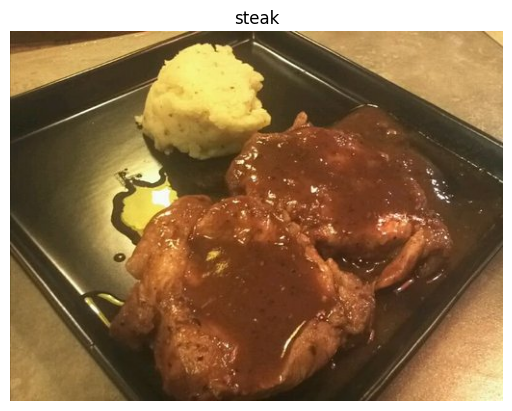

In [22]:
# vendo uma imagem aleatória das amostras de treino
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [23]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 67,  46,  19],
        [ 72,  51,  24],
        [ 76,  55,  28],
        ...,
        [237, 198, 119],
        [240, 201, 124],
        [241, 202, 125]],

       [[ 68,  47,  20],
        [ 74,  53,  26],
        [ 79,  58,  31],
        ...,
        [244, 205, 126],
        [245, 206, 129],
        [244, 205, 128]],

       [[ 69,  47,  23],
        [ 76,  54,  30],
        [ 82,  60,  36],
        ...,
        [246, 207, 128],
        [246, 207, 128],
        [244, 205, 126]],

       ...,

       [[142, 105,  52],
        [164, 127,  74],
        [170, 133,  78],
        ...,
        [240, 239, 191],
        [240, 242, 193],
        [238, 240, 191]],

       [[145, 108,  55],
        [171, 134,  81],
        [175, 138,  83],
        ...,
        [244, 243, 197],
        [251, 253, 206],
        [246, 249, 202]],

       [[146, 109,  56],
        [172, 135,  82],
        [175, 138,  83],
        ...,
        [247, 249, 20

In [24]:
# Normalização dos valores (valores entre 0 e 1)
np.max(img)
img = img/255
img

array([[[0.2627451 , 0.18039216, 0.0745098 ],
        [0.28235294, 0.2       , 0.09411765],
        [0.29803922, 0.21568627, 0.10980392],
        ...,
        [0.92941176, 0.77647059, 0.46666667],
        [0.94117647, 0.78823529, 0.48627451],
        [0.94509804, 0.79215686, 0.49019608]],

       [[0.26666667, 0.18431373, 0.07843137],
        [0.29019608, 0.20784314, 0.10196078],
        [0.30980392, 0.22745098, 0.12156863],
        ...,
        [0.95686275, 0.80392157, 0.49411765],
        [0.96078431, 0.80784314, 0.50588235],
        [0.95686275, 0.80392157, 0.50196078]],

       [[0.27058824, 0.18431373, 0.09019608],
        [0.29803922, 0.21176471, 0.11764706],
        [0.32156863, 0.23529412, 0.14117647],
        ...,
        [0.96470588, 0.81176471, 0.50196078],
        [0.96470588, 0.81176471, 0.50196078],
        [0.95686275, 0.80392157, 0.49411765]],

       ...,

       [[0.55686275, 0.41176471, 0.20392157],
        [0.64313725, 0.49803922, 0.29019608],
        [0.66666667, 0

## Exemplo ponta-a-ponta

Vamos construir nossa rede neural convolucional para acharmos padrôes em nossas imagens, mais especificamente precisamos:
* Carregar nossas imagens
* Pré-processar nossas imagens
* Construir nosso CNN
* Compilar nosso CNN
* Encaixar nosso CNN

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 152ms/step - loss: 0.5609 - accuracy: 0.7187 - val_loss: 0.4086 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.4295 - accuracy: 0.8113 - val_loss: 0.3583 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4134 - accuracy: 0.8160 - val_loss: 0.3465 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 7s 148ms/step - loss: 0.3879 - accuracy: 0.8320 - val_loss: 0.3989 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3611 - accuracy: 0.8493 - val_loss: 0.3344 - val_accuracy: 0.8620


In [26]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Usando o modelo anterior para outro dataset

In [27]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 119ms/step - loss: 1.0196 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [28]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 121ms/step - loss: 3.8432 - accuracy: 0.6460 - val_loss: 0.5589 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 6s 133ms/step - loss: 0.7542 - accuracy: 0.7167 - val_loss: 0.5840 - val_accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.5996 - accuracy: 0.7547 - val_loss: 0.4519 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.5459 - accuracy: 0.7560 - val_loss: 0.4398 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.5586 - accuracy: 0.7793 - val_loss: 0.4811 - val_accuracy: 0.7660


In [29]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               15052900  
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Classificação Binária: Vamos detalha-lo

1. Ser um com os dados
2. Pré-processando os dados (escalando, normalizando e criando levas)
3. Criando o modelo
4. Encaixando o modelo
5. Avaliando o modelo
6. Ajustando os parâmetros e melhorando o modelo
7. Repita até achar que está bom

### 1.Ser um com os dados

['1541672.jpg']
Image shape: (512, 512, 3)
['1944600.jpg']
Image shape: (306, 512, 3)


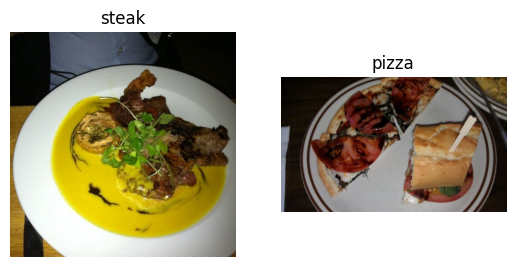

In [30]:
# Visualizar os dados
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2.Vamos preparar os dados para nosso modelo

In [31]:
# Vamos definir o caminho dos diretórios dos nossos conjuntos de dados
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


Nosso próximo passo será tornar nossos dados em **batches** (levas).

Um **batch** é um pequeno pedaço dos nossos dados totais. Melhor do que olhar os 10000 dados de uma vez, o modelo vai olhar 32 por vez.

Resulta em uma melhora no aprendizado, além de forçar menos o GPU.

In [32]:
# Criar geradores de dados de treino e de teste e reescalar eles
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [33]:
# Vamos carregar nossas imagens reescaladas e transformar eles em levas (batches)
train_data = train_datagen.flow_from_directory(directory=train_dir, #diretório selecionado de imagens
                                                target_size=(224, 224), #tamanho selecionado de imagens
                                                class_mode="binary", #tipo de dados que você está trabalhando
                                                batch_size=32) #tamanho das levas

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [34]:
# Pegar uma amostra dos dados de treino da leva
images, labels = train_data.next() # pegue a próxima leva de imagens/labels no train_data
len(images), len(labels)

(32, 32)

In [35]:
# Qunatas levas tem?
len(train_data)

47

In [36]:
1500/32

46.875

In [37]:
# Vamos pegar as duas primeiras imagens
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [38]:
images[7].shape

(224, 224, 3)

In [39]:
# Vizualizar a primeira leva de labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3.Criando nosso modelo CNN (começando pelo baseline)

Baseline é um modelo simples que você começa e tenta melhora-lo cada vez mais conforme você o experimenta.

> **Nota:** Em Deep Learning, existem infinitas formas de arquiteturas para se criar. Então um jeito bom para se começar, seria começando com uma arquitetura simples e ver se funciona com seus dados, depois introduzir a complexidade ao modelo.

In [40]:
# Vamos criar nosso modelo de forma mais prática
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [41]:
# Criando nosso modelo (baseline) CNN
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # camada de entrada de dados
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Camada de saída de dados
])

### 4.Compilando nosso modelo

In [42]:
model_4.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [43]:
len(train_data), len(test_data)

(47, 16)

### 5.Treinando e testando nosso modelo (fitting)

In [44]:
history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 10s 161ms/step - loss: 0.8979 - accuracy: 0.5833 - val_loss: 0.5240 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4368 - accuracy: 0.8100 - val_loss: 0.3879 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 7s 145ms/step - loss: 0.2683 - accuracy: 0.9060 - val_loss: 0.3424 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 6s 130ms/step - loss: 0.1237 - accuracy: 0.9640 - val_loss: 0.4118 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 0.0448 - accuracy: 0.9920 - val_loss: 0.4602 - val_accuracy: 0.8300


### 6.Avaliando nosso modelo

<Axes: >

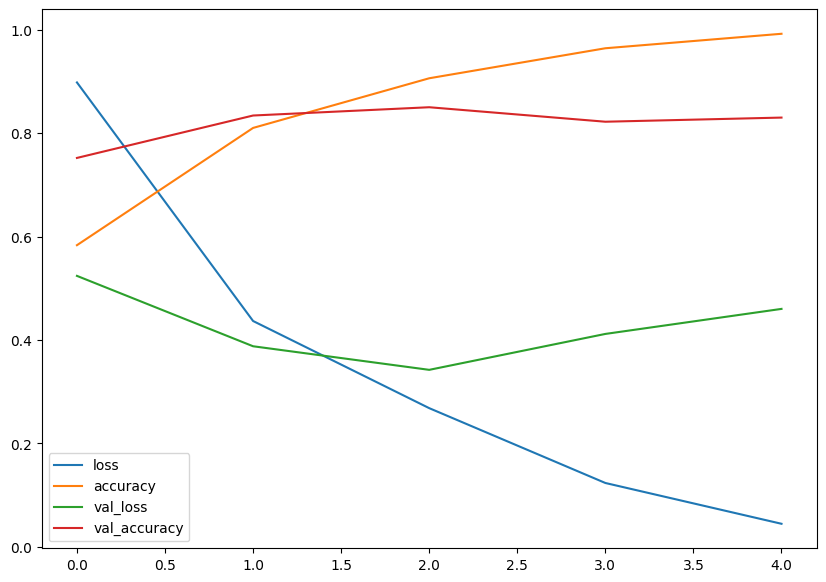

In [45]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [46]:
# Vamos gerar as validações e as curvas de treino separadas
def plot_loss_curves(history):
  """
  Retorna as curvas de erro para as metricas de treino e validação.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #Quantidade de ciclos nos definimos?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

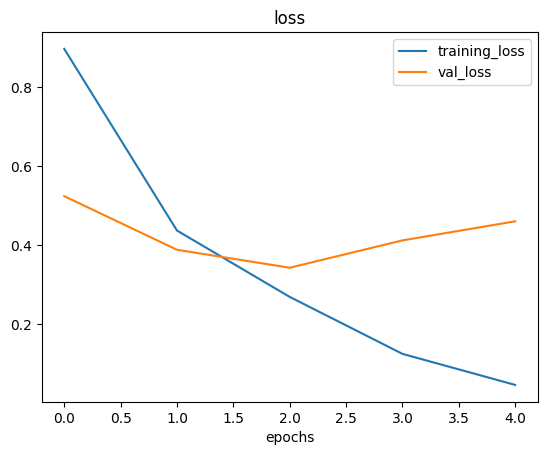

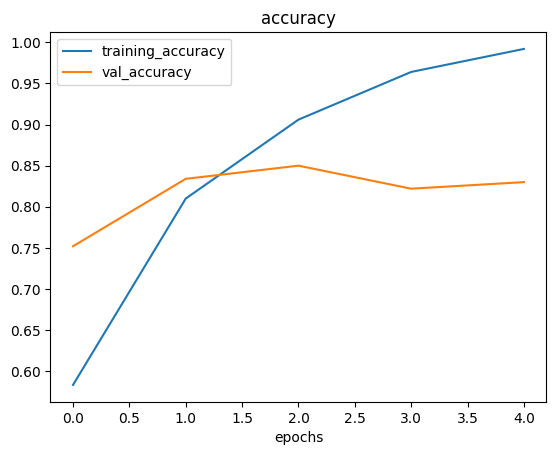

In [47]:
# Vamos visualizar o erro e precisão do modelo 4
plot_loss_curves(history_4)

### 7.Ajustando os parâmetros do modelo (problema: overfitting)

Fitting nosso modelo de machine learning tem, basicamente, 3 passos:
0. Criando nosso baseline
1. Melhorar o baseline por overfitting
2. reduzir o overfitting

Meios de induzir o overfitting:
* Aumentando o numero de camadas convolucionais
* Aumentando o numero de filtros convolucionais
* Adicionando uma nova comada densa para a saída de dados na nossa camada Flatten

Meios de reduzir o overfitting:
* Adicionar data augmentation
* Adicionar regularization layers (como as MaxPool2D)
* Adicionar mais dados...

> **Nota:** Reduzir o overfitting também é conhecido como **regularization**

In [48]:
# Criando nosso modelo (novo baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [49]:
#Compilando o modelo
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [50]:
# Fitting nosso modelo
history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 9s 158ms/step - loss: 0.5992 - accuracy: 0.6787 - val_loss: 0.4078 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4510 - accuracy: 0.7940 - val_loss: 0.4078 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 7s 144ms/step - loss: 0.4104 - accuracy: 0.8153 - val_loss: 0.3430 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3959 - accuracy: 0.8320 - val_loss: 0.3260 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3737 - accuracy: 0.8360 - val_loss: 0.3434 - val_accuracy: 0.8480


In [51]:
# Vamos verificar o esqueleto do nosso modelo
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 10)      

In [52]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_5 (Flatten)         (None, 475240)            0         
                                                                 
 dense_10 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


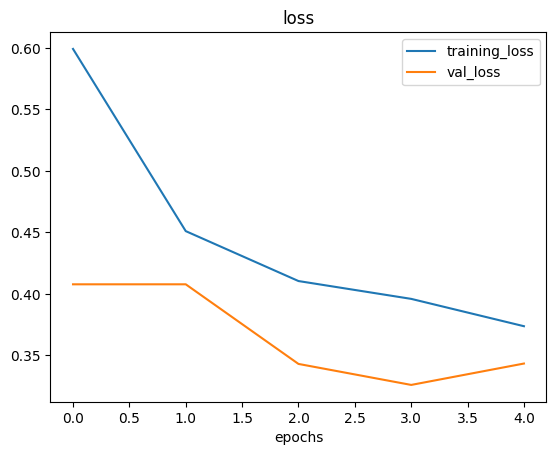

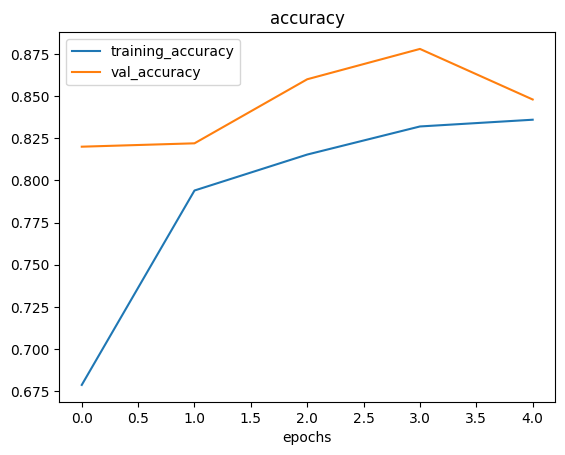

In [53]:
plot_loss_curves(history_5)

#### Data Augmentation

In [54]:
# Criando ImageDataGenerator treinando instâncias com data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # Até quanto voce deseja rotacionar a imagem
                                             shear_range=0.2, # Até quanto você deseja cisalahr a imagem
                                             zoom_range=0.2, # Até quanto você deseja aproximar
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True) # Deseja inverter a imagem?

# Criando ImageDataGenerator sem data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

> **Pergunta:** O que é data augmentation?

Data Augmentation é o processo de alterar nosso dado de treino, de forma de aumentar a diversidade de dados e permitindo nosso modelo de aprender mais padrões generalizados.

In [55]:
# Augmented training data batchs
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False # apenas para demonstração - False
                                                                   )
# Non-augmented training data batchs
print("Non-Augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False
                                               )

IMG_SIZE = (224, 224)
# Non-augmented test data batchs
print("Non-Augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented test data:
Found 500 images belonging to 2 classes.


> **Nota:** Data Augmentation normalmente só funciona com dados de treino. Usando `ImageDataGenerator` não muda o estado original dos dados, só alterando quando o modelo for utiliza-lo para treinar.

In [56]:
# Pegando exemplos das levas
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Mostrando imagem: 26


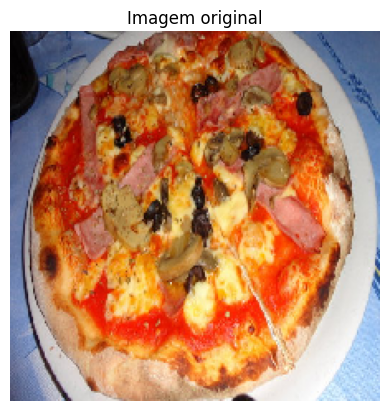

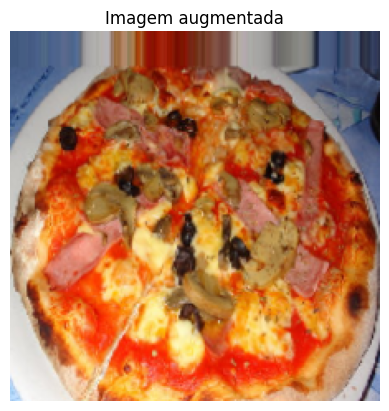

In [57]:
# Vamos visualizar as imagens
import random
random_number = random.randint(0, 32)
print(f"Mostrando imagem: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Imagem original")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Imagem augmentada")
plt.axis(False);

In [58]:
# Criando nosso modelo com dados augmentados
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_6 = model_6.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 24s 473ms/step - loss: 0.8091 - accuracy: 0.4200 - val_loss: 0.6918 - val_accuracy: 0.5300
Epoch 2/5
47/47 [==============================] - 23s 487ms/step - loss: 0.6937 - accuracy: 0.5053 - val_loss: 0.6762 - val_accuracy: 0.6200
Epoch 3/5
47/47 [==============================] - 23s 487ms/step - loss: 0.6836 - accuracy: 0.5853 - val_loss: 0.6652 - val_accuracy: 0.5360
Epoch 4/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6619 - accuracy: 0.6333 - val_loss: 0.5833 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6477 - accuracy: 0.6300 - val_loss: 0.5745 - val_accuracy: 0.7280


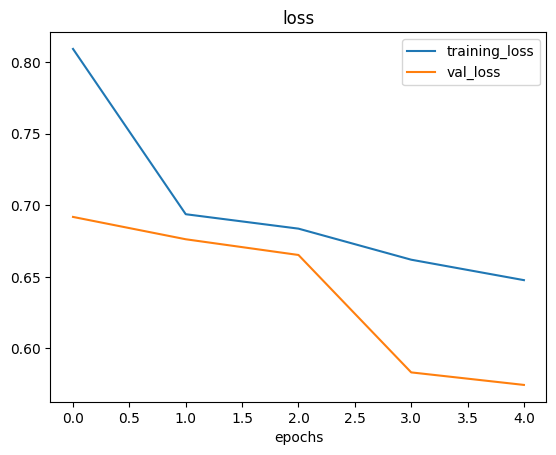

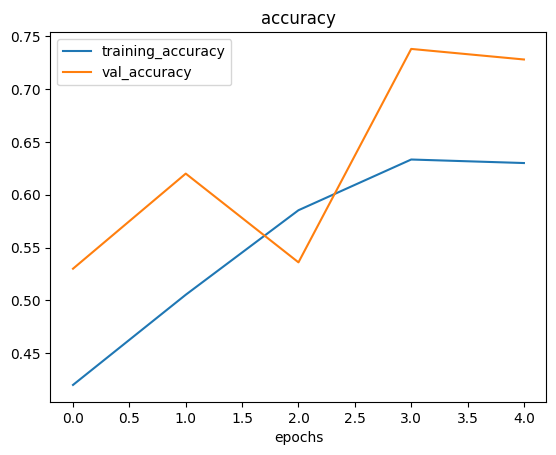

In [59]:
# Visuzaliando o resultado
plot_loss_curves(history_6)

In [60]:
# Augmented training data batchs and shuffled
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True
                                                                   )

Found 1500 images belonging to 2 classes.


In [61]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 23s 449ms/step - loss: 0.6449 - accuracy: 0.6307 - val_loss: 0.5101 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 21s 445ms/step - loss: 0.5802 - accuracy: 0.7013 - val_loss: 0.4579 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 20s 433ms/step - loss: 0.5124 - accuracy: 0.7660 - val_loss: 0.4132 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 22s 476ms/step - loss: 0.4808 - accuracy: 0.7860 - val_loss: 0.3513 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 21s 449ms/step - loss: 0.4689 - accuracy: 0.7893 - val_loss: 0.3671 - val_accuracy: 0.8540


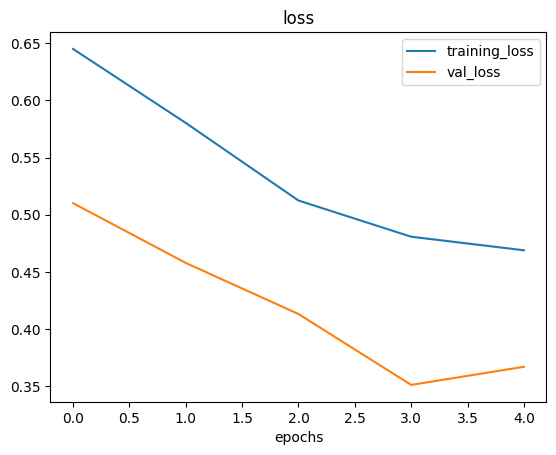

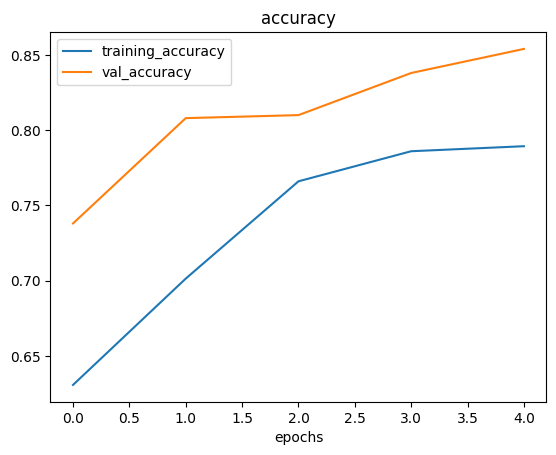

In [62]:
# Plotando a curva de erro
plot_loss_curves(history_7)

### 8.Repita até ficar satisfeito

Como melhoramos a ponto de superar o baseline, existem mais alguns detalhes que podemos fazer para melhorar nosso modelo:

* Aumentar o número de camadas (adicionar `Conv2D`/`MaxPool2D` layers)
* Aumentar o número de filtros para cada camada convolucional (de 10 a 32, ou até 64)
* Treinar por mais tempo (mais epochs)
* Achar um LR ideal
* Conseguir mais dados
* Usar **transfer learning** usar o aprendizado de outro modelo para ajustar o nosso próprio modelo

> **Prática:** Recriar o modelo do site CNN explainer (https://poloclub.github.io/cnn-explainer/) e ver como ele performa com data augmented and shuffled dados de treino.

## Fazendo uma predição com nosso modelo binário treinado em nossos dados customizados


In [63]:
import matplotlib.image as mpimg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

FileNotFoundError: ignored

In [ ]:
steak.shape

> Vamos criar uma função que ajuste a amostra a forma correta para que nosso modelo treinado possa predizer corretamente

In [109]:
def load_and_prep_image(filename, img_shape=224):
  """
  Lê uma imagem pelo filename, transforma em um tensor e redefina sua forma em (img_shape, img_shape, colour_channels)
  """
  # Lendo pelo nome
  img = tf.io.read_file(filename)
  # Transformando em um tensor
  img = tf.image.decode_image(img)
  # Transformando sua forma
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Reescalando a imagem
  img = img/255.
  return img

In [ ]:
# Vamos carregar e preparar nossa amostra
steak = load_and_prep_image("03-steak.jpeg")
steak

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

vamos criar um resultado mais visual, ao invés de somente ver a probabilidade de predição.

In [ ]:
# Relembrando nossas classes
class_names

In [ ]:
# Nós podemos indexar nossas classes redondando nosso probabilidade de predição e indexando em nossas classes
pred_class = class_names[int(tf.round(pred))]
pred_class

In [110]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Importa um imagem localizada pelo seu filename, realiza uma predição com o modelo
  selecionado e plota a imagem com a classe prevista como titulo
  """
  # Importanto a imagem
  img = load_and_prep_image(filename)

  # Realizando a previsão
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Pegando a classe predidita
  pred_class = class_names[int(tf.round(pred))]

  # Plotando
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


In [ ]:
# Testando nosso modelo na imagem
pred_and_plot(model_7, "03-steak.jpeg")

In [ ]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Classificação MultiClasse de Imagens

1. Se tornar um com os dados
2. Pre-processar os dados
3. Criar o baseline
4. Fit o modelo (overfit o modelo)
5. Avalie o modelo
6. Ajuste o modelo (reduzindo o overfitting)
7. Repita até satisfeito

## 1.Importar e ser um com os dados

In [64]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-31 14:30:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  39.8MB/s    in 14s     

2023-08-31 14:30:19 (36.7 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [65]:
import os

# Ver as 10 classes de comidas
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"Existem {len(dirnames)} diretórios e {len(filenames)} imagens em '{dirpath}'.")

Existem 2 diretórios e 0 imagens em '10_food_classes_all_data'.
Existem 10 diretórios e 0 imagens em '10_food_classes_all_data/test'.
Existem 0 diretórios e 250 imagens em '10_food_classes_all_data/test/ice_cream'.
Existem 0 diretórios e 250 imagens em '10_food_classes_all_data/test/steak'.
Existem 0 diretórios e 250 imagens em '10_food_classes_all_data/test/ramen'.
Existem 0 diretórios e 250 imagens em '10_food_classes_all_data/test/sushi'.
Existem 0 diretórios e 250 imagens em '10_food_classes_all_data/test/grilled_salmon'.
Existem 0 diretórios e 250 imagens em '10_food_classes_all_data/test/pizza'.
Existem 0 diretórios e 250 imagens em '10_food_classes_all_data/test/chicken_curry'.
Existem 0 diretórios e 250 imagens em '10_food_classes_all_data/test/chicken_wings'.
Existem 0 diretórios e 250 imagens em '10_food_classes_all_data/test/hamburger'.
Existem 0 diretórios e 250 imagens em '10_food_classes_all_data/test/fried_rice'.
Existem 10 diretórios e 0 imagens em '10_food_classes_all_

In [66]:
# Vamos definir nosso diretório de treino e de teste
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [67]:
# Vamos criar nossa lista de classes
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1710501.jpg']
Image shape: (512, 384, 3)


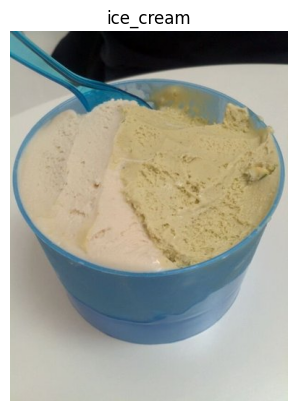

In [68]:
# Visualizar, visualizar e visualizar
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2.Pre-processando os dados

In [69]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=(1/255.))
test_datagen = ImageDataGenerator(rescale=(1/255.))

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=32
)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3.Criando o modelo (baseline)
Vamos pegar como exemplo o modelo do CNN EXPLAINER

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3),
    Activation(activation="relu"),
    Conv2D(10, 3,),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10),
    Activation(activation="softmax")
])

model_8.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

## 4.Fit o modelo

In [72]:
history_8 = model_8.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 30s 120ms/step - loss: 2.1524 - accuracy: 0.2113 - val_loss: 2.0208 - val_accuracy: 0.2612
Epoch 2/5
235/235 [==============================] - 29s 122ms/step - loss: 1.9294 - accuracy: 0.3269 - val_loss: 1.9275 - val_accuracy: 0.3056
Epoch 3/5
235/235 [==============================] - 29s 123ms/step - loss: 1.6122 - accuracy: 0.4533 - val_loss: 1.9721 - val_accuracy: 0.3176
Epoch 4/5
235/235 [==============================] - 28s 119ms/step - loss: 1.0709 - accuracy: 0.6449 - val_loss: 2.3679 - val_accuracy: 0.3040
Epoch 5/5
235/235 [==============================] - 28s 120ms/step - loss: 0.4765 - accuracy: 0.8508 - val_loss: 3.2580 - val_accuracy: 0.2844


## 5.Avaliar o modelo

In [73]:
# Avaliar em nosso dado de teste
model_8.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 3.2580 - accuracy: 0.2844


[3.258047342300415, 0.28439998626708984]

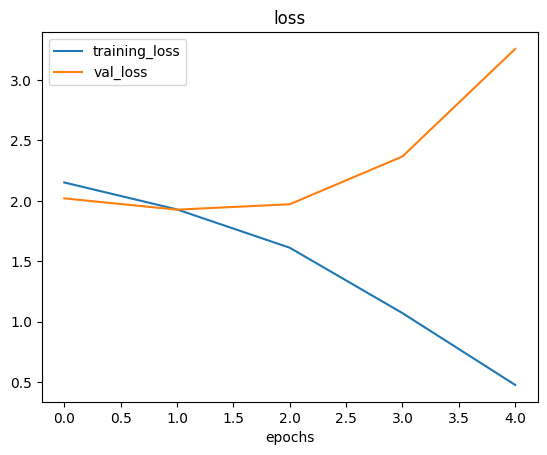

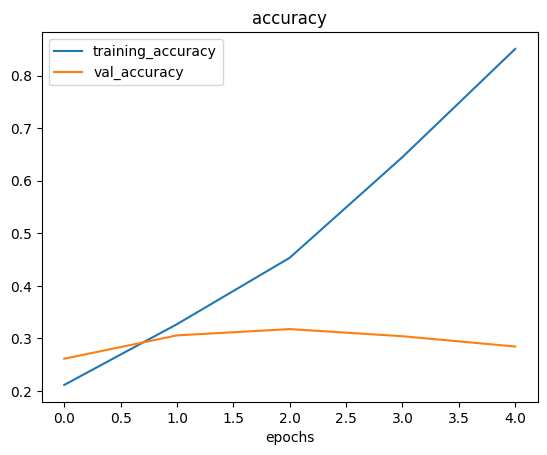

In [74]:
# Verificar a curva de erro
plot_loss_curves(history_8)

As curvas estão nos mostrando como nosso modelo estão aprendendo, porém o ideal seria que a curvas estivessem alinhadas. Do modo que se encontram, elas apresentam o problema de overfitting.

## 6.Ajustar os hyperparameters (reduzindo o overfitting)

In [75]:
# Vamos reduzir o overfitting (generalizando o modelo) por simplificar o modelo
model_8.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_10 (Activation)  (None, 222, 222, 10)      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 activation_11 (Activation)  (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 108, 108, 10)      910       
                                                      

In [76]:
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)


In [77]:
model_9.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 29160)             0         
                                                                 
 dense_15 (Dense)            (None, 10)              

In [78]:
# Fit o modelo 9

history_9 = model_9.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 29s 117ms/step - loss: 2.1208 - accuracy: 0.2459 - val_loss: 1.9168 - val_accuracy: 0.3232
Epoch 2/5
235/235 [==============================] - 29s 125ms/step - loss: 1.7023 - accuracy: 0.4247 - val_loss: 1.8064 - val_accuracy: 0.3812
Epoch 3/5
235/235 [==============================] - 33s 142ms/step - loss: 1.2746 - accuracy: 0.5880 - val_loss: 1.8920 - val_accuracy: 0.3516
Epoch 4/5
235/235 [==============================] - 27s 116ms/step - loss: 0.8388 - accuracy: 0.7471 - val_loss: 2.2402 - val_accuracy: 0.3356
Epoch 5/5
235/235 [==============================] - 27s 114ms/step - loss: 0.4688 - accuracy: 0.8767 - val_loss: 2.5189 - val_accuracy: 0.3180


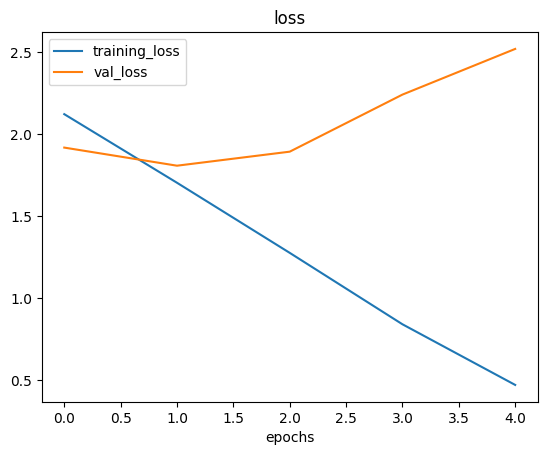

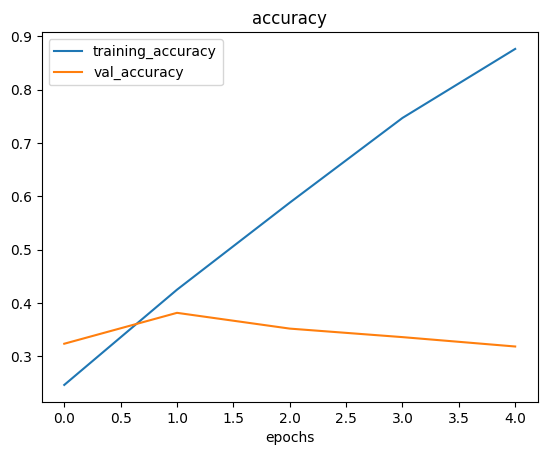

In [79]:
plot_loss_curves(history_9)

Não houve melhoria

### Vamos tentar Data Augmentation para reduzir o overfitting

In [81]:
train_datagen_augmented = ImageDataGenerator(
    rescale=(1/255.),
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.


In [82]:
# Vamos criar um novo modelo para usar os dados augmentados
model_10 = tf.keras.models.clone_model(model_8)

# Compilar o modelo clonado
model_10.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [83]:
#Fitting o modelo clonado
history_10 = model_10.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 109s 452ms/step - loss: 2.3063 - accuracy: 0.1159 - val_loss: 2.2645 - val_accuracy: 0.1524
Epoch 2/5
235/235 [==============================] - 103s 437ms/step - loss: 2.2378 - accuracy: 0.1688 - val_loss: 2.1440 - val_accuracy: 0.2132
Epoch 3/5
235/235 [==============================] - 104s 441ms/step - loss: 2.1328 - accuracy: 0.2339 - val_loss: 2.0783 - val_accuracy: 0.2340
Epoch 4/5
235/235 [==============================] - 105s 444ms/step - loss: 2.0634 - accuracy: 0.2692 - val_loss: 1.9782 - val_accuracy: 0.2996
Epoch 5/5
235/235 [==============================] - 102s 435ms/step - loss: 2.0213 - accuracy: 0.2848 - val_loss: 1.8552 - val_accuracy: 0.3572


In [87]:
model_8.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 3.2580 - accuracy: 0.2844


[3.258047103881836, 0.28439998626708984]

In [85]:
model_10.evaluate(test_data)

79/79 [==============================] - 8s 95ms/step - loss: 1.8552 - accuracy: 0.3572


[1.8552199602127075, 0.3571999967098236]

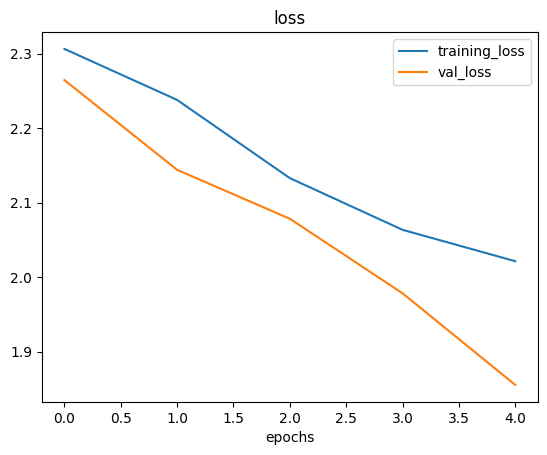

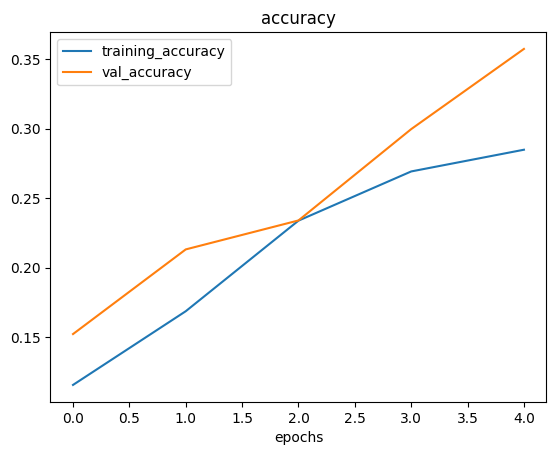

In [86]:
plot_loss_curves(history_10)

Agora as curvas aparentam estar na forma correta.

## 7.Repita até estar satisfeito

In [104]:
model_11 = Sequential([
    Conv2D(50, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(50, 3, activation="relu"),
    MaxPool2D(pool_size=3),
    Conv2D(50, 3, activation="relu"),
    Conv2D(50, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(50, 3, activation="relu"),
    Conv2D(50, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_11.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [105]:
model_11.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 222, 222, 50)      1400      
                                                                 
 conv2d_51 (Conv2D)          (None, 220, 220, 50)      22550     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 73, 73, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 71, 71, 50)        22550     
                                                                 
 conv2d_53 (Conv2D)          (None, 69, 69, 50)        22550     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 34, 34, 50)       0         
 g2D)                                                

In [2]:
history_11 = model_11.fit(
    train_data_augmented,
    epochs=10,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

NameError: ignored

In [1]:
plot_loss_curves(history_11)

NameError: ignored

## Vamos realizar predições dos modelos


In [106]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [113]:
# Reconfigurar a função para funcionar com multiclasse

def pred_and_plot(model, filename, class_names=class_names):
  """
  Importa um imagem localizada pelo seu filename, realiza uma predição com o modelo
  selecionado e plota a imagem com a classe prevista como titulo
  """
  # Importanto a imagem
  img = load_and_prep_image(filename)

  # Realizando a previsão
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Adicionando logica para multiclasse
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))] # Pegando a classe predidita

  # Plotando
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 62ms/step


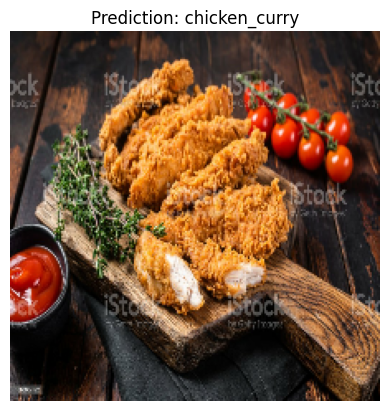

In [117]:
pred_and_plot(
    model=model_11,
    filename="frangofrito.jpg",
    class_names=class_names
)

Aparentemente nosso modelo não performou bem!

## Salvando e Carregando nosso modelo

In [118]:
# Salvando
model_11.save("modelo11salvo")

In [122]:
# Carregando
model_11_carregado = tf.keras.models.load_model("modelo11salvo")
model_11_carregado.evaluate(test_data)
model_11_carregado.summary()

79/79 [==============================] - 7s 86ms/step - loss: 2.3068 - accuracy: 0.1008
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 222, 222, 50)      1400      
                                                                 
 conv2d_51 (Conv2D)          (None, 220, 220, 50)      22550     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 73, 73, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 71, 71, 50)        22550     
                                                                 
 conv2d_53 (Conv2D)          (None, 69, 69, 50)        22550     
                                                                 
 max_pooling2d_30 (MaxPoolin  (